In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


**Open** : Starting price <br>
**High** : Highest price puring the day <br>
**Low**  : Lowest price during the day <br>
**Close** : Closing price <br>
**Adj Close** : Adjusted closing price <br>
**Volume** : Amount of shares traded that day

In [4]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


**Data Preprocessing and Visualization**

In [6]:
# since the values ​​are the same we can remove this column from the dataset
data=data.drop(['Adj Close'],axis=1)
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [7]:
# converting date column of type object to datetime
data["Date"] = pd.to_datetime(data["Date"])

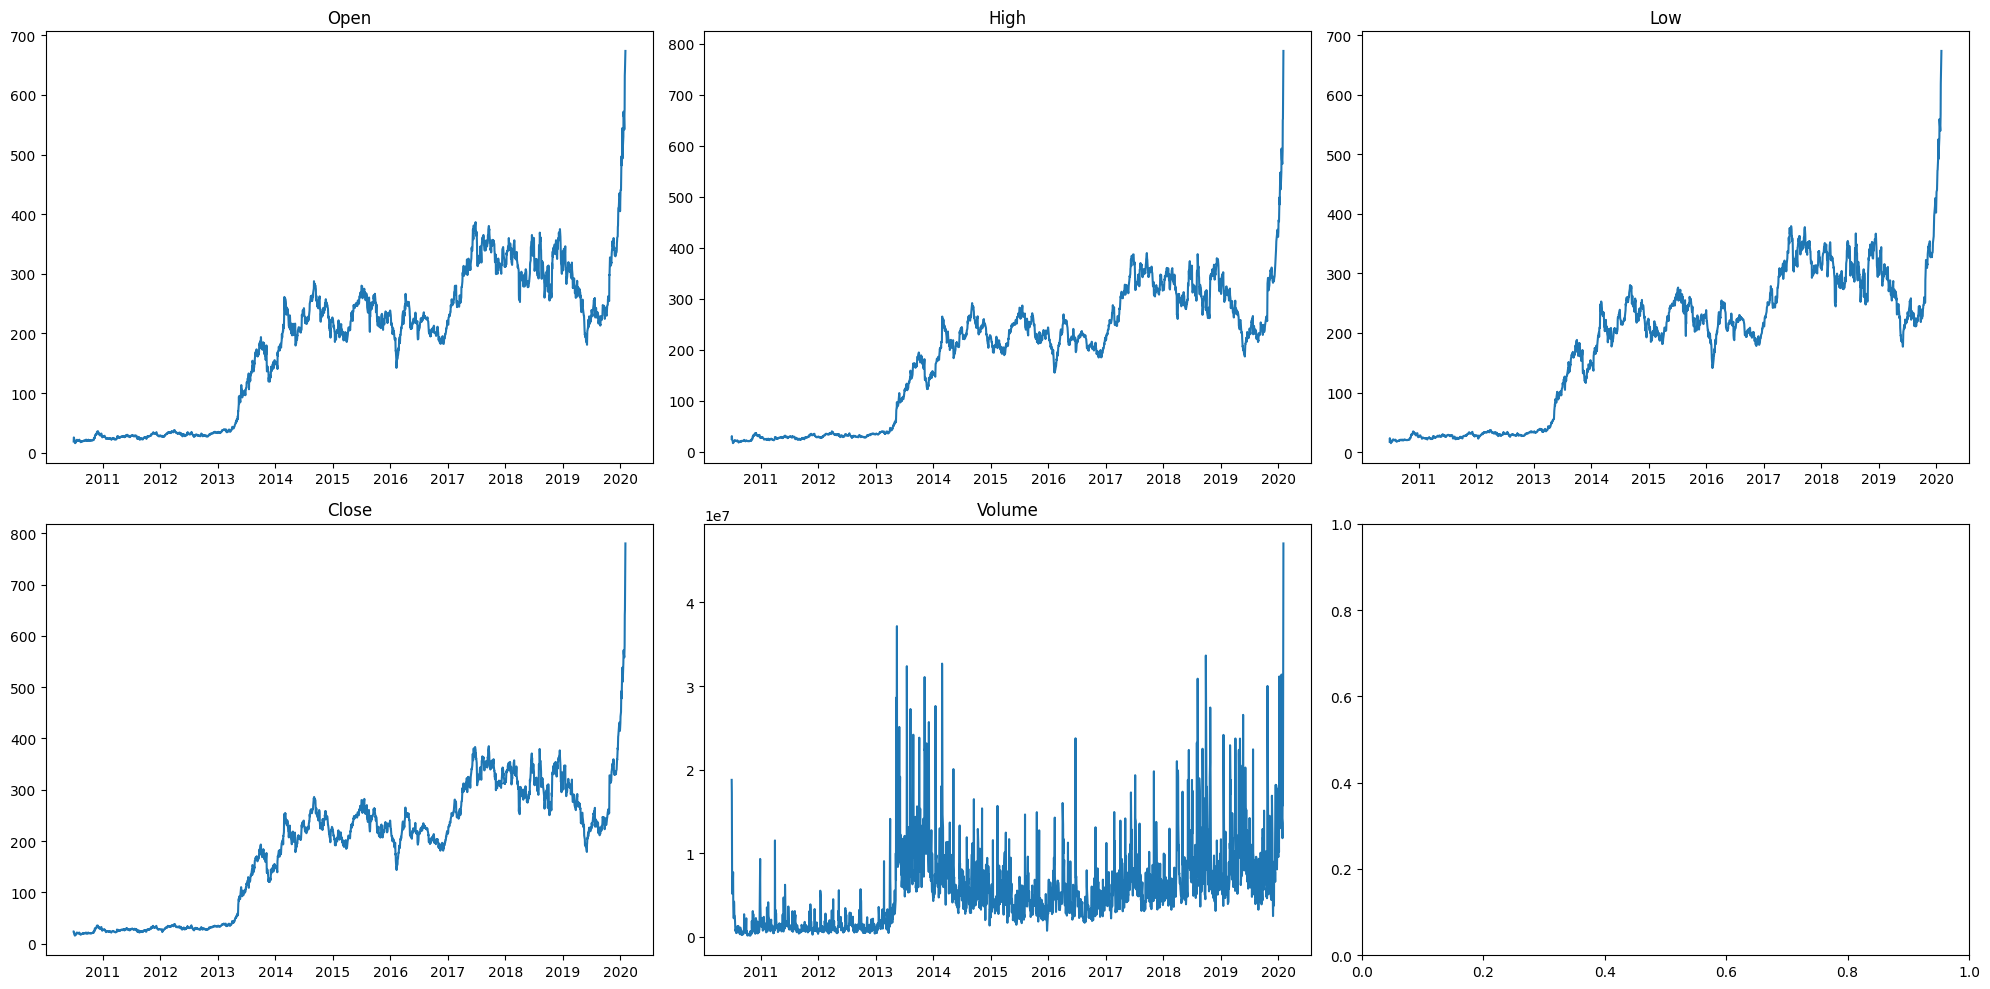

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
date = data["Date"]

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]
    value = data[col]
    ax.plot(date, value)
    ax.set_title(col)

plt.tight_layout()
plt.show()


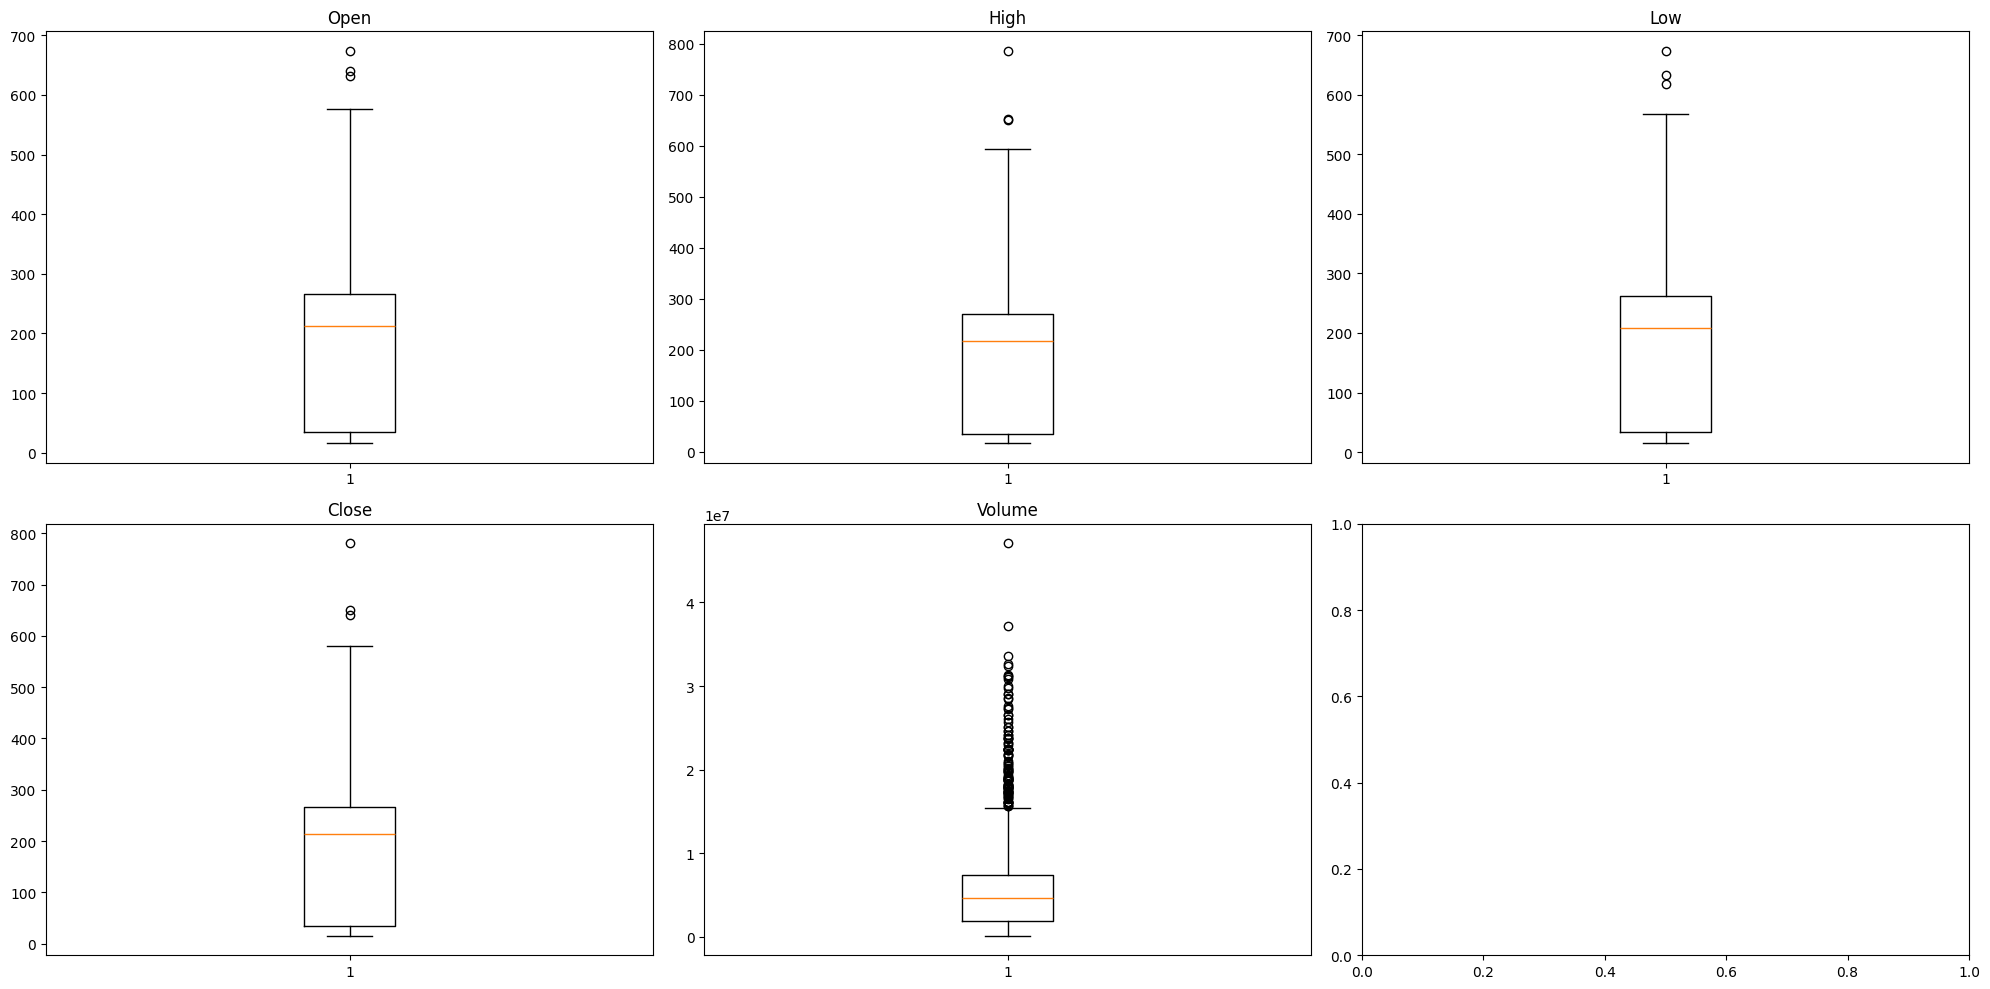

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]
    ax.set_title(col)
    ax.boxplot(data[col])

plt.tight_layout()
plt.show()


**Outlier Detection**

In [10]:
for col in columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  # Uç değerleri tespit etme
  outliers_iqr = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
  print("***",col,"***")
  print(outliers_iqr)



*** Open ***
           Date        Open        High        Low       Close    Volume
2413 2020-01-30  632.419983  650.880005  618.00000  640.809998  29005700
2414 2020-01-31  640.000000  653.000000  632.52002  650.570007  15719300
2415 2020-02-03  673.690002  786.140015  673.52002  780.000000  47065000
*** High ***
           Date        Open        High        Low       Close    Volume
2413 2020-01-30  632.419983  650.880005  618.00000  640.809998  29005700
2414 2020-01-31  640.000000  653.000000  632.52002  650.570007  15719300
2415 2020-02-03  673.690002  786.140015  673.52002  780.000000  47065000
*** Low ***
           Date        Open        High        Low       Close    Volume
2413 2020-01-30  632.419983  650.880005  618.00000  640.809998  29005700
2414 2020-01-31  640.000000  653.000000  632.52002  650.570007  15719300
2415 2020-02-03  673.690002  786.140015  673.52002  780.000000  47065000
*** Close ***
           Date        Open        High        Low       Close    Volume

In [11]:
# replace outliers with average
for col in columns:
  mean_value = data[col].mean()
  data[col] = np.where((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)), mean_value, data[col])

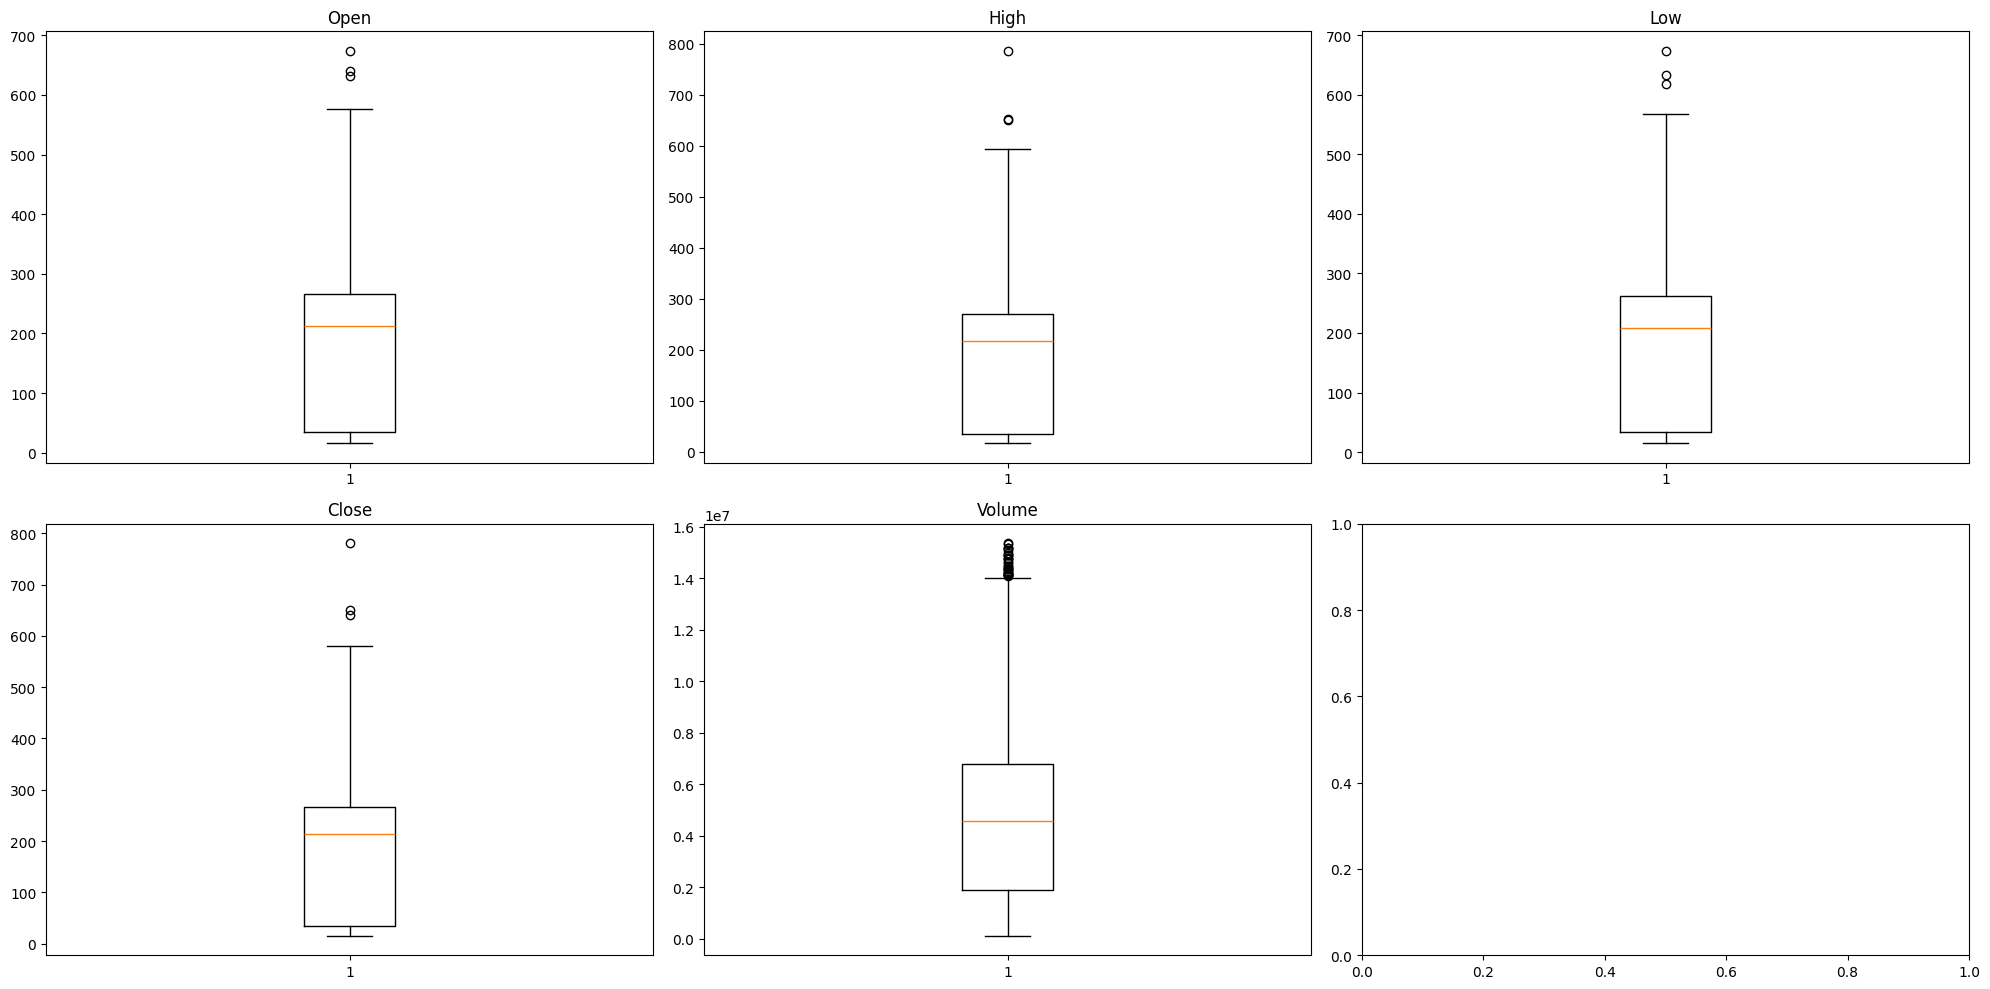

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]
    ax.set_title(col)
    ax.boxplot(data[col])

plt.tight_layout()
plt.show()



**Stationarity** <br>
Stationarity means that the mean, variance and autocovariance of a time series remain constant over time. Stationarity of the time series is especially important in forecasting models because many models assume that the series is stationary. If the mean or variance of a series changes over time, this can create difficulties in the modeling phase.

**Stationarization Methods** <br>
It is usually possible to make a non-stationary series stationary by transformations and differentiations. Two basic methods:

**Logarithmic Transformation:** It is used to reduce the scale of the data and stabilize the variance.

**Differentiating:** It is a method of making the time series stationary by taking the difference of the time series according to a certain delay. First difference is usually sufficient, but second difference can also be taken if necessary.

**Stationarity Test: Augmented Dickey-Fuller (ADF) Test** <br>
The ADF test is one of the most commonly used tests to understand whether a series is stationary or not. <br>
**Hypotheses**:
**Null Hypothesis (H0):** The series is not stationary. <br>
**Alternative Hypothesis (H1):** The series is stationary. <br>
If the p-value is less than 0.05 as a result of the ADF test, the null hypothesis is rejected and the series is considered stationary.

In [13]:
# For adf testing, it is necessary to work only with numerical values. Therefore, the date column can be set as an index.
data.set_index('Date', inplace=True)

In [14]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(columns):
  result = adfuller(data[col])
  print("***",col,"***")
  print('Augmneted Dickey_fuller Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

  print('critical values at different levels:')
  for k, v in result[4].items():
      print('\t%s: %.3f' % (k, v))

*** Open ***
Augmneted Dickey_fuller Statistic: 1.245135
p-value: 0.996283
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** High ***
Augmneted Dickey_fuller Statistic: 1.408030
p-value: 0.997150
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Low ***
Augmneted Dickey_fuller Statistic: 1.147034
p-value: 0.995599
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Close ***
Augmneted Dickey_fuller Statistic: 1.400069
p-value: 0.997114
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Volume ***
Augmneted Dickey_fuller Statistic: -2.246084
p-value: 0.189947
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [15]:
# Since the p-value is greater than 0.05 as a result of the ADF test, the series is not stationary and it is necessary to make it stationary for a correct analysis.
# Therefore, we can make the series stationary by differencing.
differenced_series = data.diff().dropna()

In [16]:
from statsmodels.tsa.stattools import adfuller

for i,col in enumerate(columns):
  result = adfuller(differenced_series[col])
  print("***",col,"***")
  print('Augmneted Dickey_fuller Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

  print('critical values at different levels:')
  for k, v in result[4].items():
      print('\t%s: %.3f' % (k, v))

*** Open ***
Augmneted Dickey_fuller Statistic: -16.103030
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** High ***
Augmneted Dickey_fuller Statistic: -5.800180
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Low ***
Augmneted Dickey_fuller Statistic: -14.788791
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Close ***
Augmneted Dickey_fuller Statistic: -6.151177
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567
*** Volume ***
Augmneted Dickey_fuller Statistic: -14.979738
p-value: 0.000000
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


**ACF and PACF**

**ACF (Autocorrelation Function):** ACF shows how correlated a time series is with its lagged values.

**PACF (Partial Autocorrelation Function):** PACF only gives independently measured autocorrelation at a certain lag level. PACF eliminates the influence of other delays to show the direct relationship between each delay.

These two functions help us understand whether there is a trend, seasonality or persistence in the series.

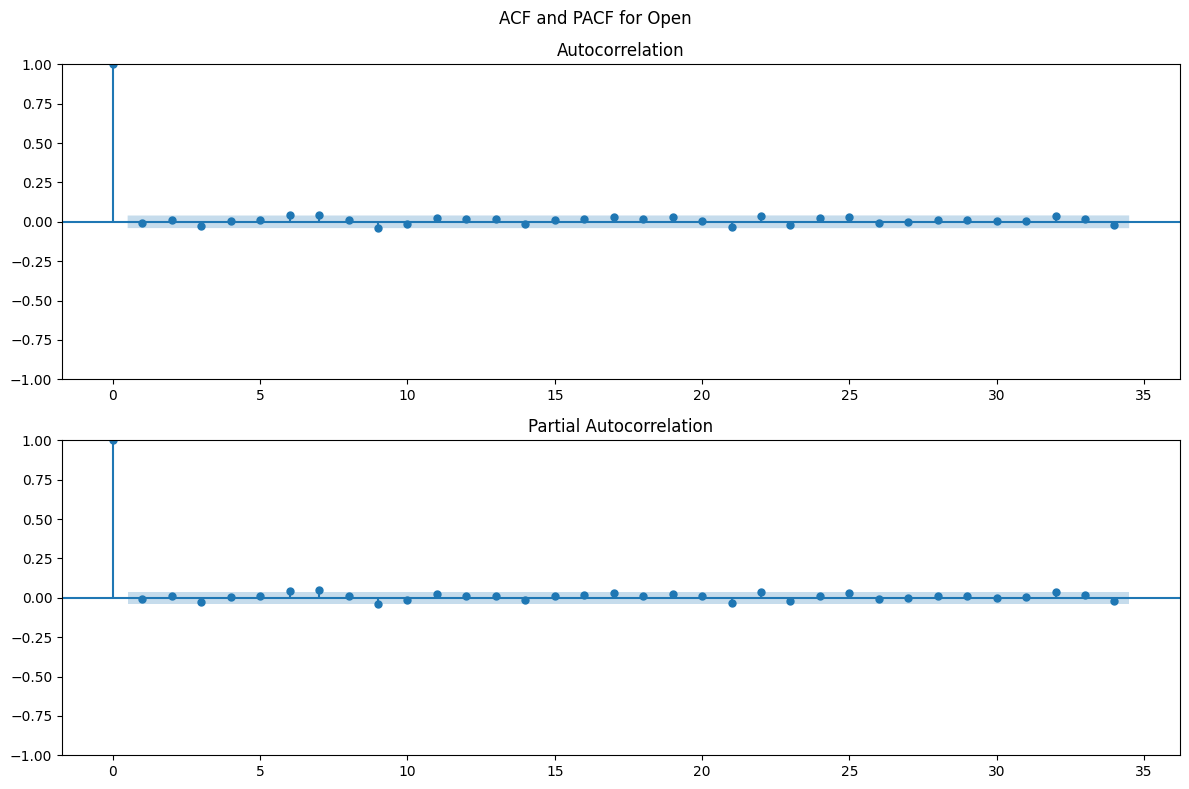

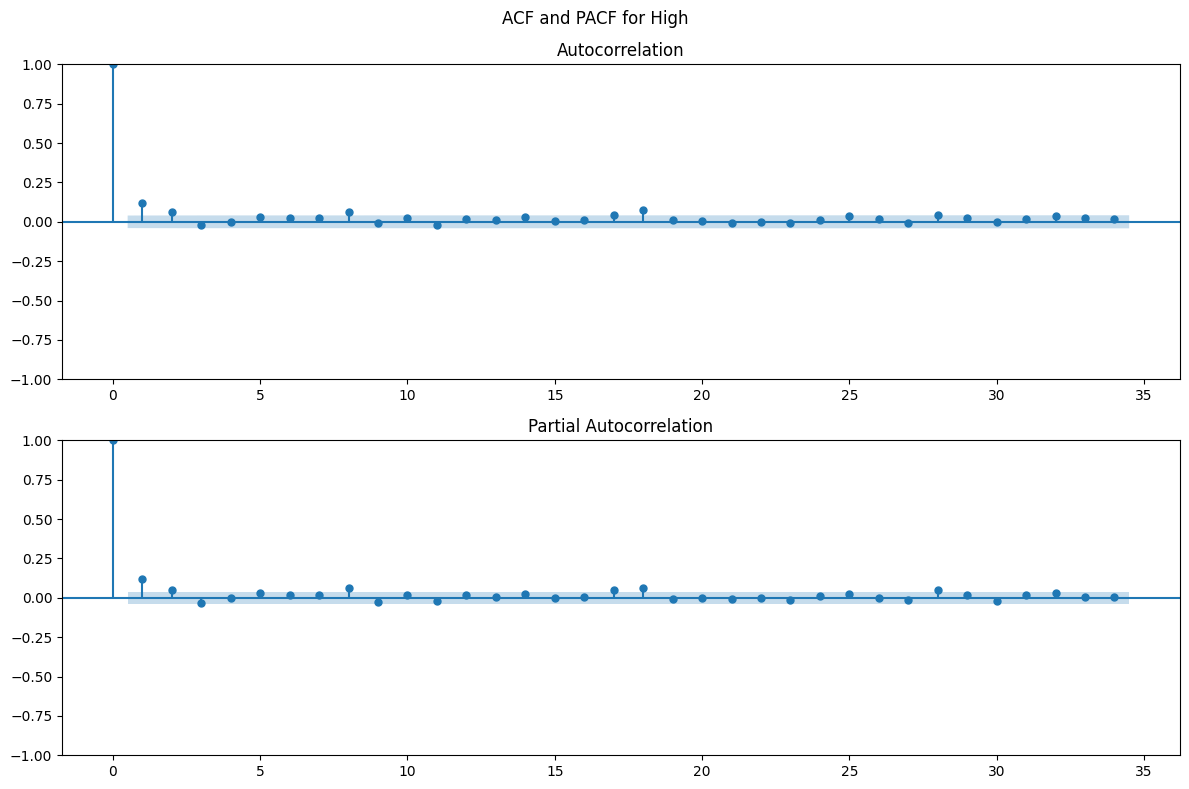

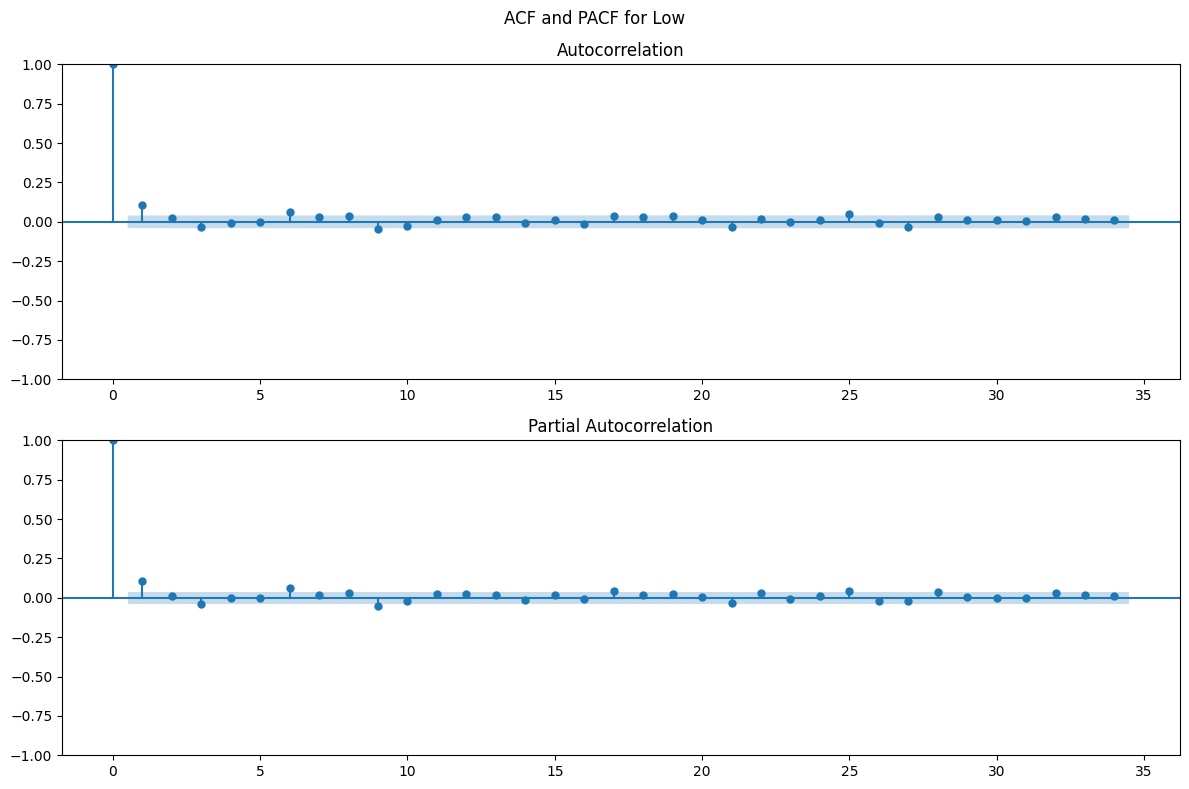

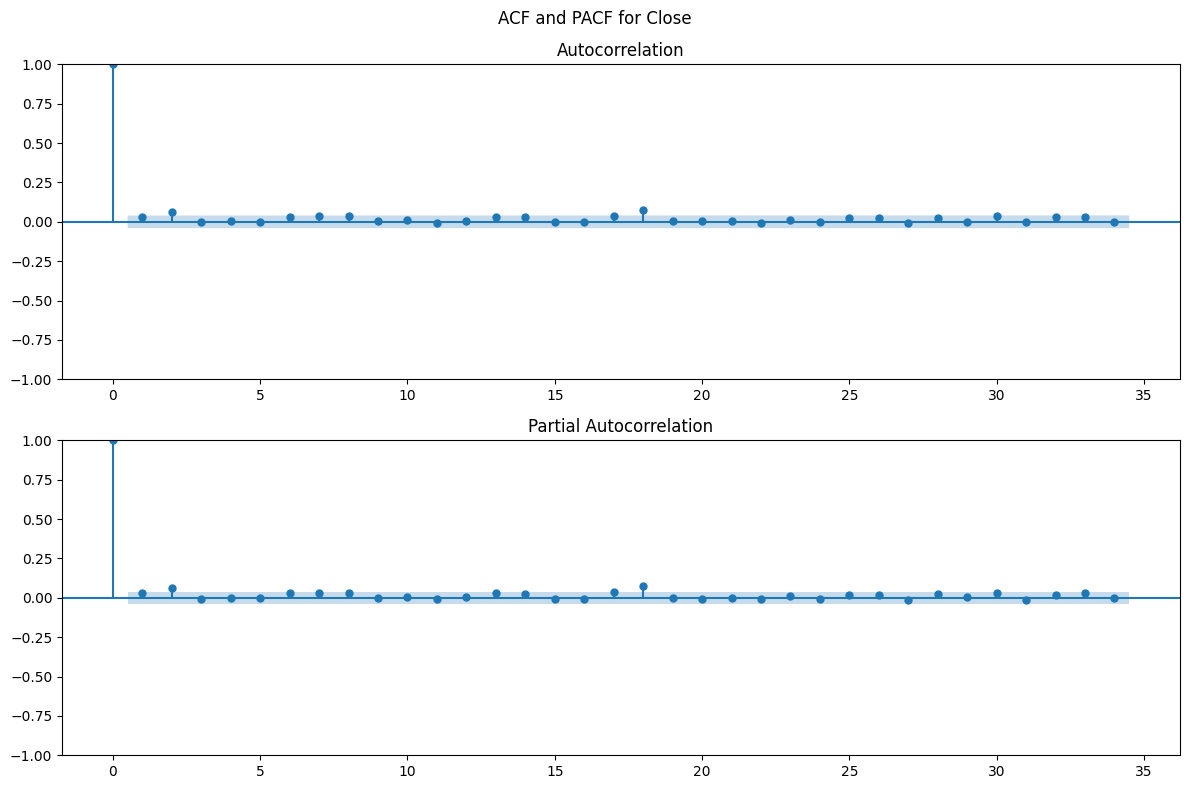

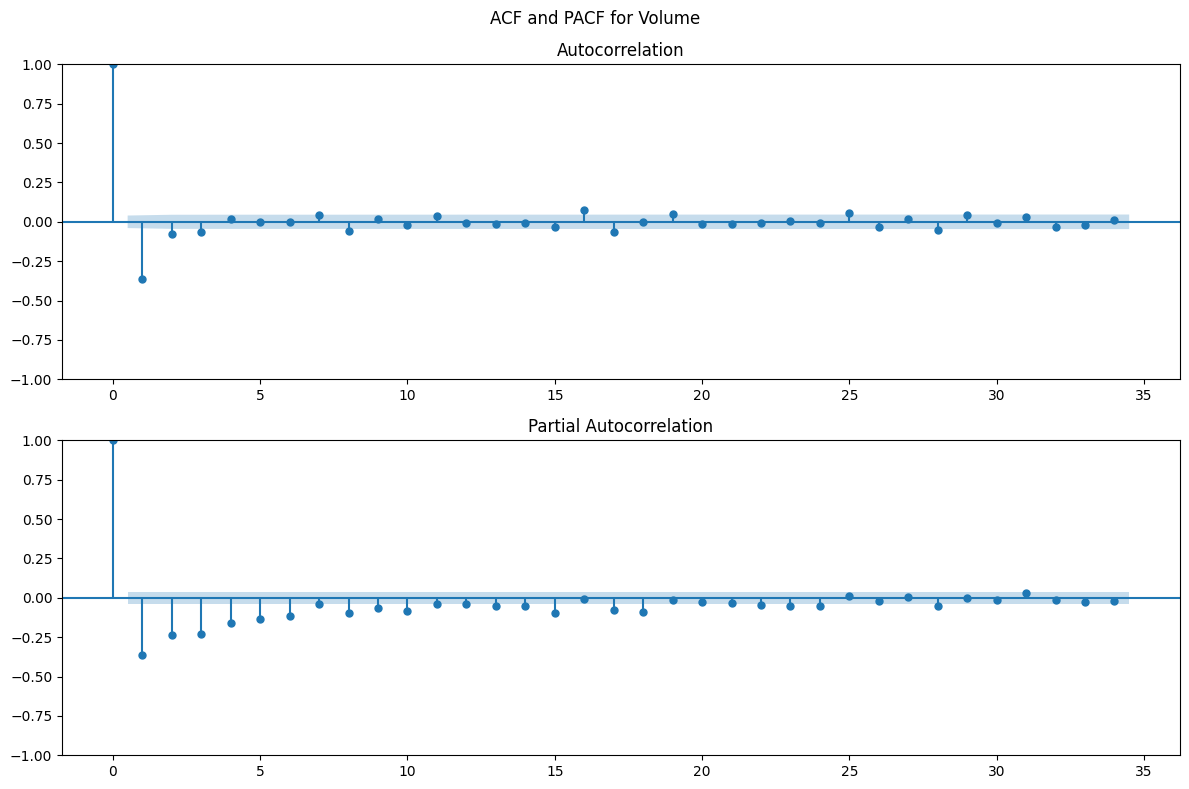

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in differenced_series:
  fig, ax = plt.subplots(2, 1, figsize=(12, 8))
  fig.suptitle(f"ACF and PACF for {col}")
  plot_acf(differenced_series[col], ax=ax[0])
  plot_pacf(differenced_series[col], ax=ax[1])
  plt.tight_layout()
  plt.show()

**ACF Chart** shows seasonality. If there is fluctuation in a certain pattern, this may be an indication of seasonality.
Since there is no fluctuation in the above graphs, it can be said that there is no seasonality. <br>
**PACF Chart** shows whether the series has become stationary or not. If there are values ​​approaching zero outside the first few lags, it indicates that the series has become stationary. In the Pacf charts, it appears that the series has become stationary.

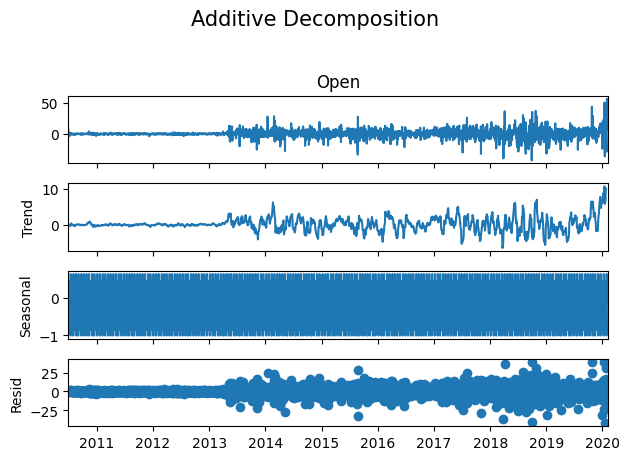

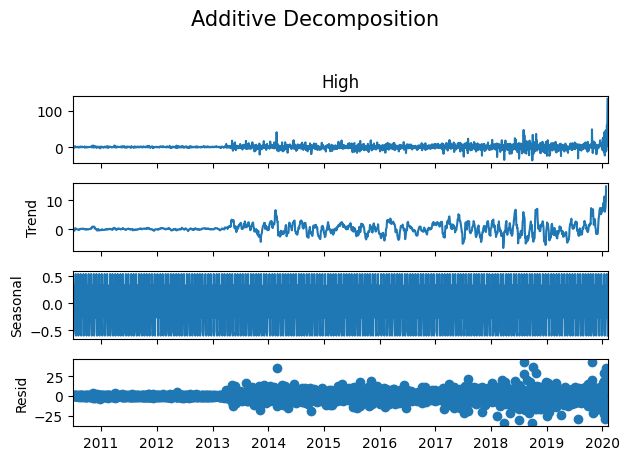

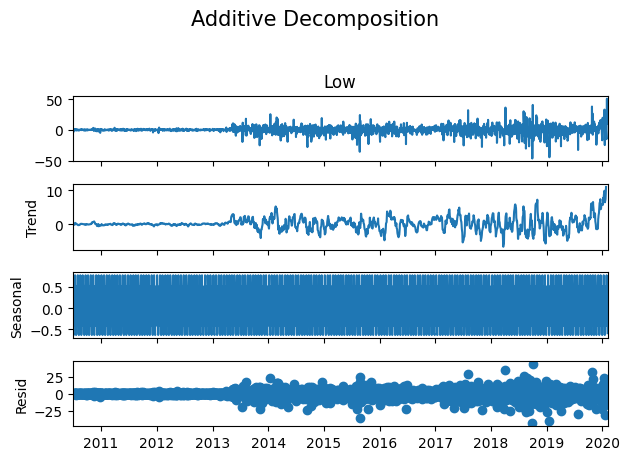

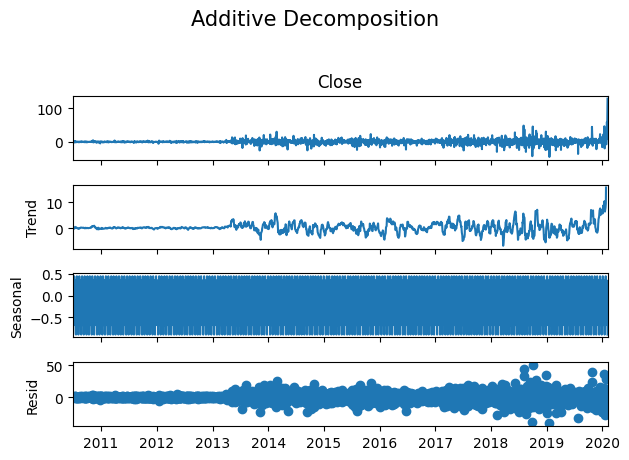

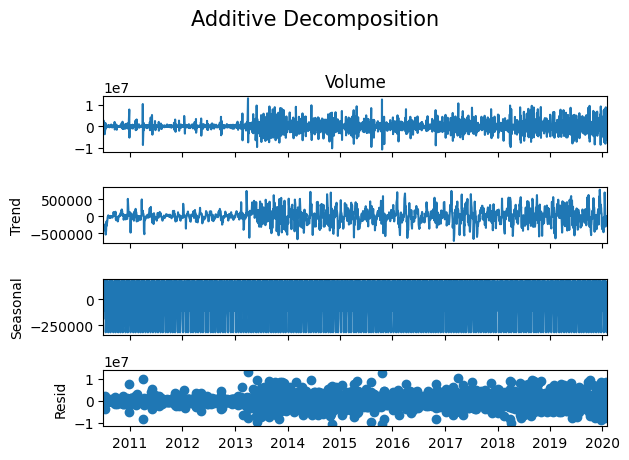

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# parsing time series
for i,col in enumerate(columns):
  # Additive Decomposition
  additive_decomposition = seasonal_decompose(differenced_series[col], model='additive', period=12)

  additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=15)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

In the code above, the time series was divided into components with the additive model, and the trend, seasonality and resid are clearly visible for each feature. <br>
The images specifically show an upward **trend**, which means prices are rising over time. <br>
Since there is not much fluctuation or a clear pattern in the **seasonal** component, we can say that there is no seasonality. <br>
The **resid** component represents the remaining part of the data that is adjusted for seasonality and trend. Large blue dots and fluctuations appear in the residuals component, which it indicates that there are some changes in the series that are unpredictable, unexplained or that the model cannot calculate.

**Modeling**

**ARIMA Model** <br>
The ARIMA model is a powerful model that helps us make predictions on time series data and has three main components:

**AR (AutoRegressive):** Shows the relationship of the series with its own delayed values. <br>
**I (Integrated):** Shows how many times the difference is taken to make the data stationary. <br>
**MA (Moving Average):** Shows the relationship of the series with the error terms.

ARIMA (AutoRegressive Integrated Moving Average) is used to model data by combining autoregressive (AR), difference (I) and moving average (MA) components. ARIMA model is defined by three main parameters: p, d and q:

**p:** AR term. It shows how many delays we will take into account the past values ​​of the series. <br>
**d:** Degree of integration (I term). It indicates how many times we made the series stationary by taking difference. <br>
**q:** MA term. It shows how many delays the series relates to error terms.

**ARIMA** model is suitable for series that are stable, have trend content but do not have seasonality. **SARIMA** model is suitable for series containing stable and seasonal trends. That's why the Arima model is more suitable for this series.

In [20]:
from pmdarima import auto_arima

# Finding the best parameters with Auto ARIMA
auto_model = auto_arima(differenced_series['Close'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16302.401, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16301.266, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16301.680, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16291.407, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16293.387, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16293.384, Time=0.88 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16274.459, Time=2.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=16293.513, Time=0.86 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=16291.532, Time=1.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=16275.671, Time=11.68 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16275.419, Time=10.58 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 28.564 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:    

In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(differenced_series['Close'], order=(1, 0, 1))
arima_result = model.fit()

print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2415
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8133.709
Date:                Wed, 06 Nov 2024   AIC                          16275.419
Time:                        12:25:57   BIC                          16298.577
Sample:                             0   HQIC                         16283.841
                               - 2415                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1284      2.218      0.509      0.611      -3.219       5.476
ar.L1          0.9965      0.009    115.350      0.000       0.980       1.013
ma.L1         -0.9713      0.013    -76.068      0.0

**Evaluating Model Performance**

**MAE**, **MSE**, and **RMSE** are used to measure how accurate the model's predictions are. <br>
**MAE (Mean Absolute Error)**:
The mean absolute error is the average of the absolute values ​​of the differences between the predicted values ​​and the actual values.
Small MAE values ​​indicate that the accuracy of the model is high. <br>
**MSE (Mean Squared Error)**:
The mean square error is the average of the squares of the forecast errors. Since it measures errors in squares, large errors become more important.
MSE is usually kept low.<br>
**RMSE (Root Mean Squared Error)**:
It is the square root of the mean square error. RMSE = 14.93 indicates that the model deviates from the actual values ​​by 14.93 units on average.

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# for 6 months
forecast_steps = 180
forecast = arima_result.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean  # predict values
actual_values = differenced_series['Close'][-len(forecasted_values):]  # actual values

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse =  np.sqrt(mse)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 9.270528621669001
MSE: 222.93676526370876
RMSE: 14.931067117380083


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


**Holt-Winters Model**

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(differenced_series['Close'], seasonal='add', trend='add', seasonal_periods=12)
fitted_model = model.fit()

# 6 month forecast
forecast_steps = 6
forecast = fitted_model.forecast(steps=forecast_steps)

train_size = int(len(differenced_series['Close']) * 0.8)
train, test = differenced_series['Close'][:train_size], differenced_series['Close'][train_size:]
predictions = fitted_model.forecast(steps=len(test))

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 36.562350366158284
MSE: 1575.8515636806617
RMSE: 39.69699691010218


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


**SARIMAX Model**

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(differenced_series['Close'], order=(1,0,1), seasonal_order=(1,0,1,12)).fit()

# prediction for 6 months
forecast_steps = 6
forecast = fitted_model.forecast(steps=forecast_steps)

train_size = int(len(differenced_series['Close']) * 0.8)
train, test = differenced_series['Close'][:train_size], differenced_series['Close'][train_size:]


predictions = sarima_model.forecast(steps=len(test))

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 8.988338995695571
MSE: 179.75902278173857
RMSE: 13.40742416654812


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


**Results** <br>
* Arima model gave better results than Holt-Winters Model. But Sarimax model gave the best results. This is because the Sarimax model can better capture small cyclical patterns or trend structure that exist but are not clearly visible in the time series. This model may be the most suitable model for this data set.

**Resources:**
* https://medium.com/machine-learning-t%C3%BCrkiye/zaman-serileri-analizi-1-181422b3c4b4
* https://medium.com/machine-learning-t%C3%BCrkiye/zaman-serileri-analizi-2-e4f6a750cd5d
* https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python